In [1]:
import pandas as pd
import numpy as np
import json

from utils.models import find_best_model
from utils.search_model import train_models
from utils.get_parameters import max_score_for_each, get_combinations
from utils.visual import plot_results
import os
import matplotlib.pyplot as plt


## Model Training

The first step of model training is to train combinations of algorithm, imputation and balancing approaches\
The algorithms are:

    - KNN
    - Decision Tree
    - Logistic regression
    - SVM
    - Naive Bayes
    - RandomForestClassifier
    - GradientBoostingClassifier
    - BaggingClassifier
    - XGBClassifier

The balancing algorithms are:

    - SMOTE (oversampling)
    - MWMOTE (oversampling)
    - ADASYN (oversampling)
    - AllKNN (undersampling)
    - None (using original data)

The imputation techqniues are:

    - Simple Imputer with mode: for categorical features
    - Simple Imputer with mean: for numerical features
    - KNN Imputer with mean: for numerical features


## Project structure

- [GitHub](https://github.com/albermakaryan/Machine_learning)

- **[data/](data/)**
   - **[initial_data/](data/initial_data/)**:  Full data set for modeling
   - **[model_data/](data/model_data/)**    :  Period 3 data set
- **[src/](src/)**
   - **[models/](src/models/)**   :  The best models for each algorithm in .pkl format
   - **[results/](src/results/)** :  Performance results for each algorithm and total
   - **[utils/](src/utisl/)**     :  Utility functions package
      - **[__init__.py](src/utils/__init__.py)**:  Python package initialization
      - **[data_preparation.py](src/utils/data_preparation.py)**:  Utility function for data preparation
      - **[functions.py](src/utils/functions.py)**:  Utility function for best results combination
      - **[get_parameters.py](src/utils/__init__.py)**:  Utility functions for parameters' combination collection 
      - **[metrics.py](src/utils/metrics.py)**:  Utility function to evaluate model performance
      - **[search_model.py](src/utils/search_model.py)**:  Utility function to train default models with several combinations
      - **[visual.py](src/utils/visual.py)**:  Utility functions to plot models' performance results
      - **[models.py](src/utils/models.py)**:  Utility functions to train 'the best' model for each algorithm
   - **[main.py](src/main.py)**:  The main file in a project
   - **[eda-1.ipynb](src/eda-1.ipynb)**:  Jupyter Notebook for EDA
   - **[end_to_end.ipynb](src/end_to_end.ipynb)**:  Jupyter Notebook for end-to-end workflow presentation
   - **[visualizations.ipynb](src/visualizations.ipynb)**:   Jupyter Notebook for visualizations

- **[requirements.txt](/requirements.txt)**: The inclusion of a requirements.txt file makes it easier to recreate the project's environment and install the necessary dependencies.

## Demo

In [2]:
df = pd.read_csv("../data/initial_data/frmgham2_project_data_full.csv")
print(f"Shape: {df.shape}\n")
df.head()

Shape: (11627, 28)



,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,BPMEDS,...,PERIOD,HDLC,LDLC,ANGINA,HOSPMI,MI_FCHD,ANYCHD,CVD,HYPERTEN,STROKE
0,1,195.0,39,106.0,70.0,0,0.0,26.97,0,0.0,...,1,NaN,NaN,0,1,1,1,1,0,0
1,1,209.0,52,121.0,66.0,0,0.0,NaN,0,0.0,...,3,31.0,178.0,0,1,1,1,1,0,0
2,2,250.0,46,121.0,81.0,0,0.0,28.73,0,0.0,...,1,NaN,NaN,0,0,0,0,0,0,0
3,2,260.0,52,105.0,69.5,0,0.0,29.43,0,0.0,...,2,NaN,NaN,0,0,0,0,0,0,0
4,2,237.0,58,108.0,66.0,0,0.0,28.50,0,0.0,...,3,54.0,141.0,0,0,0,0,0,0,0


In [3]:
performances_df = train_models(df=df,target_var='CVD',
                                path_to_save='../src/results/general/full_data_performances_9_models_5_balancers.csv')



../src/results/general/full_data_performances_9_models_5_balancers.csv already exists. Do you want to overwrite it? (y/[other key]) 


In [4]:
performances_df

,Algorithm,Imputer,Imbalance,Metric,Score,Set,MainMetric
0,LogisticRegression,SimpleImputer_mean__SimpleImputer_mode,SMOTE,Train-F-1,97.53,Train,F-1
1,DecisionTree,SimpleImputer_mean__SimpleImputer_mode,SMOTE,Train-F-1,100.00,Train,F-1
2,NaiveBayes,SimpleImputer_mean__SimpleImputer_mode,SMOTE,Train-F-1,93.23,Train,F-1
3,KNN,SimpleImputer_mean__SimpleImputer_mode,SMOTE,Train-F-1,98.27,Train,F-1
4,SVM,SimpleImputer_mean__SimpleImputer_mode,SMOTE,Train-F-1,98.29,Train,F-1
...,...,...,...,...,...,...,...
1075,SVM,KNNImptuer__SimpleImputer_mode,AllKNN,Test-AUC,96.68,Test,AUC
1076,RandomForest,KNNImptuer__SimpleImputer_mode,AllKNN,Test-AUC,97.19,Test,AUC
1077,GradientBoosting,KNNImptuer__SimpleImputer_mode,AllKNN,Test-AUC,96.48,Test,AUC
1078,Bagging,KNNImptuer__SimpleImputer_mode,AllKNN,Test-AUC,96.72,Test,AUC


In [5]:
# get the best results

test_scores = max_score_for_each(performances_df,set_= 'Test')
train_scores = max_score_for_each(performances_df,set_='Train')
differences_df = train_scores.rename(columns={'Score':'TrainScore'}).drop(['Metric','Set','Imputer','Imbalance'],axis=1)\
            .merge(test_scores.rename(columns={"Score":"TestScore"}).drop(['Metric','Set','Imputer','Imbalance'],axis=1),\
                    on=['Algorithm','MainMetric'])

In [6]:
counts = performances_df[['Algorithm','Imputer','Imbalance']].drop_duplicates().shape[0]/9
print(f"Number of models for each algorithm: {int(counts)}")

Number of models for each algorithm: 10


In [7]:
# best model training combinations for training
# this is the combination of model, imputation and balancing techniques

combinations = get_combinations(df=performances_df,by_features=['Algorithm','Metric'],by_metric='AUC',by_set='Test')

In [8]:
print("Number of models: ",len(combinations))
combinations[0]

Number of models:  9


[sklearn.ensemble._bagging.BaggingClassifier,
 ['SimpleImputer_mean',
  SimpleImputer(),
  'SimpleImputer_mode',
  SimpleImputer(strategy='most_frequent')],
 imblearn.over_sampling._smote.base.SMOTE]

In [9]:
# df = pd.read_csv("../data/initial_data/frmgham2_project_data_full.csv")

In [10]:
# train best models 
for combination in combinations:
    algorithm, imputer,balanc = combination
    # print(combination)
    # quit()
    print(algorithm.__name__,balanc.__name__,imputer)
    best_model,best_params,output = find_best_model(algorithm=algorithm,
                                                    balancer=balanc,
                                                    imputer=imputer,
                                                    df=df,
                                                    ovewrite=False)


BaggingClassifier SMOTE ['SimpleImputer_mean', SimpleImputer(), 'SimpleImputer_mode', SimpleImputer(strategy='most_frequent')]



BaggingClassifier hyperparameter tuning was already done. Do you want to do it again? [y/[other key]]  


DecisionTreeClassifier MWMOTE ['KNNImptuer', KNNImputer(), 'SimpleImputer_mode', SimpleImputer(strategy='most_frequent')]



DecisionTreeClassifier hyperparameter tuning was already done. Do you want to do it again? [y/[other key]]  


GradientBoostingClassifier MWMOTE ['SimpleImputer_mean', SimpleImputer(), 'SimpleImputer_mode', SimpleImputer(strategy='most_frequent')]



GradientBoostingClassifier hyperparameter tuning was already done. Do you want to do it again? [y/[other key]]  


KNeighborsClassifier MWMOTE ['SimpleImputer_mean', SimpleImputer(), 'SimpleImputer_mode', SimpleImputer(strategy='most_frequent')]



KNeighborsClassifier hyperparameter tuning was already done. Do you want to do it again? [y/[other key]]  


LogisticRegression MWMOTE ['SimpleImputer_mean', SimpleImputer(), 'SimpleImputer_mode', SimpleImputer(strategy='most_frequent')]



LogisticRegression hyperparameter tuning was already done. Do you want to do it again? [y/[other key]]  


GaussianNB ADASYN ['KNNImptuer', KNNImputer(), 'SimpleImputer_mode', SimpleImputer(strategy='most_frequent')]



GaussianNB hyperparameter tuning was already done. Do you want to do it again? [y/[other key]]  


RandomForestClassifier SMOTE ['KNNImptuer', KNNImputer(), 'SimpleImputer_mode', SimpleImputer(strategy='most_frequent')]



RandomForestClassifier hyperparameter tuning was already done. Do you want to do it again? [y/[other key]]  


SVC MWMOTE ['KNNImptuer', KNNImputer(), 'SimpleImputer_mode', SimpleImputer(strategy='most_frequent')]



SVC hyperparameter tuning was already done. Do you want to do it again? [y/[other key]]  


XGBClassifier SMOTE ['KNNImptuer', KNNImputer(), 'SimpleImputer_mode', SimpleImputer(strategy='most_frequent')]



XGBClassifier hyperparameter tuning was already done. Do you want to do it again? [y/[other key]]  


In [11]:
total_perfomance = pd.read_csv("../results/general/best_results_all_models.csv")
total_perfomance_approaches = total_perfomance.drop(['Set','Metric','Score'],axis=1).drop_duplicates()

In [12]:
# which works better 
total_perfomance_approaches.sort_values("Algorithm")

,Algorithm,Imbalance,ImputerCat,ImputerNum
48,BaggingClassifier,SMOTE,SimpleImputer_mode,SimpleImputer_mean
60,DecisionTreeClassifier,MWMOTE,SimpleImputer_mode,KNNImptuer
84,GaussianNB,ADASYN,SimpleImputer_mode,KNNImptuer
24,GradientBoostingClassifier,MWMOTE,SimpleImputer_mode,SimpleImputer_mean
0,KNeighborsClassifier,MWMOTE,SimpleImputer_mode,SimpleImputer_mean
36,LogisticRegression,MWMOTE,SimpleImputer_mode,SimpleImputer_mean
72,RandomForestClassifier,SMOTE,SimpleImputer_mode,KNNImptuer
12,SVC,MWMOTE,SimpleImputer_mode,KNNImptuer
96,XGBClassifier,SMOTE,SimpleImputer_mode,KNNImptuer


In [13]:
# mean performance
test_performances = total_perfomance[total_perfomance['Set'] == 'Test']
# train_erformances = total_perfomance[total_perfomance['Set'] == 'Train']
mean_performance = test_performances.groupby("Algorithm",as_index=False)['Score'].mean()
mean_performance['Score'] = mean_performance['Score'].round(2)
mean_performance.sort_values("Score",inplace=True)

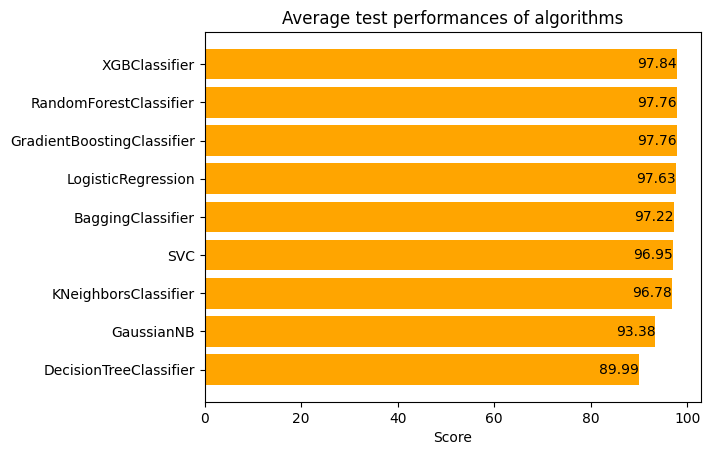

In [14]:
fig,ax = plt.subplots(1,1)

ax.barh(mean_performance['Algorithm'],mean_performance['Score'],color='orange')
for j, value in enumerate(mean_performance.Score):  # Changed the variable name to j
    ax.annotate(str(value), xy=(value,j), ha='right', va='center')

ax.set_xlabel("Score")
plt.title("Average test performances of algorithms")

plt.show()

In [22]:
# algs = [alg.split("_")[0] for alg in os.listdir("../models/")]

In [20]:
algorithm = 'XGBClassifier'

<Figure size 640x480 with 0 Axes>

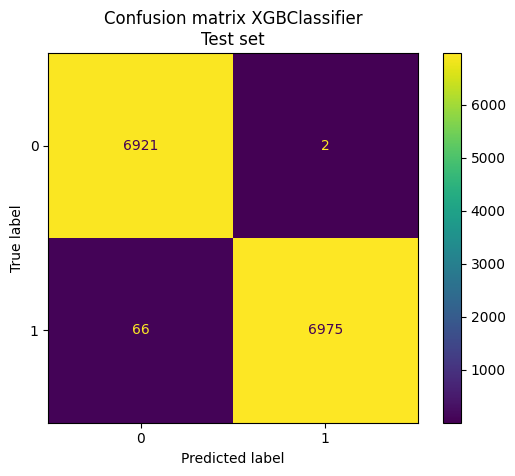

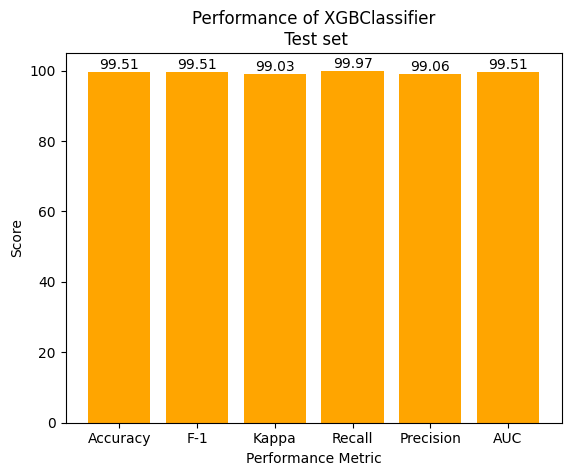

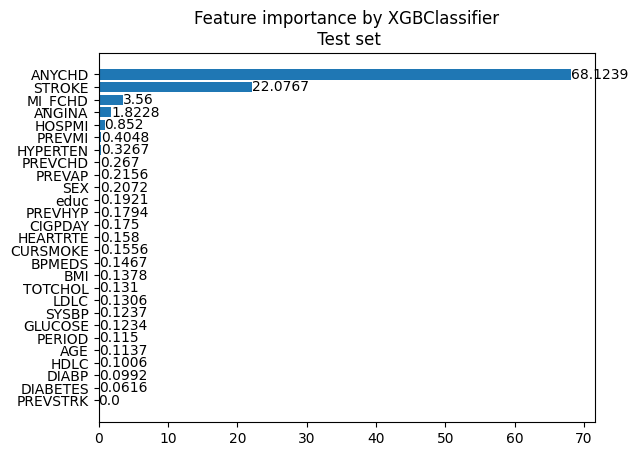

In [21]:
model = plot_results(performances_df,algorithm,df,set_='Test')